In [1]:
import glob
import os
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import load_model
import natsort

In [2]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
physical_gpu = tf.config.list_physical_devices('GPU')
print(len(physical_gpu))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18345226098061743218
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2210135120596050863
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3049888155
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3228776746658545790
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:08:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11889540264334918561
physical_device_desc: "device: XLA_GPU device"
]
1


In [3]:
# dt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
seed = 0
tf.random.set_seed(seed)

model_metrics = 'acc'    # acc, mse, mae (epoch마다 표시)
num_epochs = 10
num_batch = 100
num_split = 0.2

In [5]:
#새로운 feature 추가 데이터
new_H_path= 'D:/sensors journal/TT_V/train/new/txt'
new_H_files = glob.glob(os.path.join(new_H_path, "*.txt"))
new_H_files = natsort.natsorted(new_H_files)
print(new_H_files)
new_H_each_file = (pd.read_csv(f, header=None, sep = "\t") for f in new_H_files)

['D:/sensors journal/TT_V/train/new/txt\\1.txt', 'D:/sensors journal/TT_V/train/new/txt\\2.txt', 'D:/sensors journal/TT_V/train/new/txt\\3.txt', 'D:/sensors journal/TT_V/train/new/txt\\4.txt', 'D:/sensors journal/TT_V/train/new/txt\\5.txt', 'D:/sensors journal/TT_V/train/new/txt\\6.txt', 'D:/sensors journal/TT_V/train/new/txt\\7.txt', 'D:/sensors journal/TT_V/train/new/txt\\8.txt', 'D:/sensors journal/TT_V/train/new/txt\\9.txt', 'D:/sensors journal/TT_V/train/new/txt\\10.txt', 'D:/sensors journal/TT_V/train/new/txt\\11.txt', 'D:/sensors journal/TT_V/train/new/txt\\12.txt', 'D:/sensors journal/TT_V/train/new/txt\\13.txt', 'D:/sensors journal/TT_V/train/new/txt\\14.txt', 'D:/sensors journal/TT_V/train/new/txt\\15.txt', 'D:/sensors journal/TT_V/train/new/txt\\16.txt', 'D:/sensors journal/TT_V/train/new/txt\\17.txt', 'D:/sensors journal/TT_V/train/new/txt\\18.txt', 'D:/sensors journal/TT_V/train/new/txt\\19.txt', 'D:/sensors journal/TT_V/train/new/txt\\20.txt', 'D:/sensors journal/TT_V/tra

In [6]:
#test 데이터
test_new_H_path= 'D:/sensors journal/TT_V/test/new/txt'
test_new_H_files = glob.glob(os.path.join(test_new_H_path, "*.txt"))
test_new_H_files = natsort.natsorted(test_new_H_files)
print(test_new_H_files)
test_new_H_each_file = (pd.read_csv(f, header=None, sep = "\t") for f in test_new_H_files)

['D:/sensors journal/TT_V/test/new/txt\\1.txt', 'D:/sensors journal/TT_V/test/new/txt\\2.txt', 'D:/sensors journal/TT_V/test/new/txt\\3.txt', 'D:/sensors journal/TT_V/test/new/txt\\4.txt', 'D:/sensors journal/TT_V/test/new/txt\\5.txt', 'D:/sensors journal/TT_V/test/new/txt\\6.txt', 'D:/sensors journal/TT_V/test/new/txt\\7.txt', 'D:/sensors journal/TT_V/test/new/txt\\8.txt', 'D:/sensors journal/TT_V/test/new/txt\\9.txt', 'D:/sensors journal/TT_V/test/new/txt\\10.txt', 'D:/sensors journal/TT_V/test/new/txt\\11.txt', 'D:/sensors journal/TT_V/test/new/txt\\12.txt', 'D:/sensors journal/TT_V/test/new/txt\\13.txt', 'D:/sensors journal/TT_V/test/new/txt\\14.txt', 'D:/sensors journal/TT_V/test/new/txt\\15.txt', 'D:/sensors journal/TT_V/test/new/txt\\16.txt', 'D:/sensors journal/TT_V/test/new/txt\\17.txt', 'D:/sensors journal/TT_V/test/new/txt\\18.txt', 'D:/sensors journal/TT_V/test/new/txt\\19.txt', 'D:/sensors journal/TT_V/test/new/txt\\20.txt', 'D:/sensors journal/TT_V/test/new/txt\\21.txt', 

In [7]:
#class별 비율 확인 - feature 추가된 파일
new_H_file_list = list(new_H_each_file)
print(new_H_file_list)
new_input_num=14
ratio = 2
new_sampling_ratio_H = []

for i in new_H_file_list:
    class0 = len(i[i[new_input_num]==0]) 
    class1 = len(i[i[new_input_num]==1])
    print("class0: ", class0)
    print("class1: ", class1)
    print("class0/class1: ", '%0.2f' %(class0/class1))
    print("new_sampling ratio: ", '%0.2f' %(ratio*class1/class0), '\n')
    new_sampling_ratio_H.append(ratio*class1/class0)

[        0    1   2       3    4       5    6    7       8       9       10  \
0     0.50  1.0   1  0.6667  1.0  1.0000  1.0  1.0  0.3333  0.0000  0.3175   
1     0.50  1.0   1  0.8000  0.5  1.0000  1.0  1.0  0.3333  0.1667  0.3175   
2     0.50  1.0   0  0.5000  1.0  0.0758  0.0  1.0  0.3333  0.0000  0.3175   
3     0.50  0.5   1  0.2000  1.0  0.0606  0.5  1.0  0.3333  0.0000  0.3175   
4     0.75  1.0   0  0.3333  0.5  0.2424  0.5  1.0  0.3333  0.0000  0.3175   
...    ...  ...  ..     ...  ...     ...  ...  ...     ...     ...     ...   
5244  0.50  0.0   0  0.5000  0.0  0.7727  0.5  1.0  1.0000  0.0000  0.6349   
5245  0.50  0.0   0  0.5000  0.0  0.7576  0.5  1.0  1.0000  0.0000  0.6349   
5246  0.50  0.0   1  0.5000  1.0  1.0000  0.0  1.0  1.0000  0.0000  0.6349   
5247  0.50  0.0   1  0.5000  1.0  1.0000  0.0  1.0  1.0000  0.0000  0.6349   
5248  0.50  0.0   1  0.5000  0.0  1.0000  0.0  1.0  1.0000  0.0000  0.6349   

      11     12  13  14  
0      1  0.223   1   0  
1      1  

class0:  38039
class1:  3106
class0/class1:  12.25
new_sampling ratio:  0.16 

class0:  52387
class1:  6222
class0/class1:  8.42
new_sampling ratio:  0.24 

class0:  435
class1:  25
class0/class1:  17.40
new_sampling ratio:  0.11 

class0:  1090
class1:  86
class0/class1:  12.67
new_sampling ratio:  0.16 

class0:  6686
class1:  1375
class0/class1:  4.86
new_sampling ratio:  0.41 

class0:  30434
class1:  3022
class0/class1:  10.07
new_sampling ratio:  0.20 

class0:  10688
class1:  1934
class0/class1:  5.53
new_sampling ratio:  0.36 

class0:  8488
class1:  1297
class0/class1:  6.54
new_sampling ratio:  0.31 

class0:  6551
class1:  844
class0/class1:  7.76
new_sampling ratio:  0.26 

class0:  22534
class1:  1513
class0/class1:  14.89
new_sampling ratio:  0.13 

class0:  6598
class1:  1079
class0/class1:  6.11
new_sampling ratio:  0.33 

class0:  34740
class1:  7605
class0/class1:  4.57
new_sampling ratio:  0.44 

class0:  8327
class1:  545
class0/class1:  15.28
new_sampling ratio:  0

class0:  20165
class1:  3878
class0/class1:  5.20
new_sampling ratio:  0.38 

class0:  2864
class1:  302
class0/class1:  9.48
new_sampling ratio:  0.21 

class0:  47750
class1:  8509
class0/class1:  5.61
new_sampling ratio:  0.36 

class0:  19370
class1:  1732
class0/class1:  11.18
new_sampling ratio:  0.18 

class0:  39989
class1:  2663
class0/class1:  15.02
new_sampling ratio:  0.13 

class0:  17886
class1:  1478
class0/class1:  12.10
new_sampling ratio:  0.17 

class0:  28230
class1:  3292
class0/class1:  8.58
new_sampling ratio:  0.23 

class0:  25643
class1:  2553
class0/class1:  10.04
new_sampling ratio:  0.20 

class0:  15373
class1:  1750
class0/class1:  8.78
new_sampling ratio:  0.23 

class0:  4054
class1:  463
class0/class1:  8.76
new_sampling ratio:  0.23 

class0:  3268
class1:  299
class0/class1:  10.93
new_sampling ratio:  0.18 

class0:  3545
class1:  715
class0/class1:  4.96
new_sampling ratio:  0.40 

class0:  8411
class1:  696
class0/class1:  12.08
new_sampling ratio

class0:  23165
class1:  515
class0/class1:  44.98
new_sampling ratio:  0.04 

class0:  5223
class1:  726
class0/class1:  7.19
new_sampling ratio:  0.28 

class0:  437
class1:  27
class0/class1:  16.19
new_sampling ratio:  0.12 

class0:  3267
class1:  166
class0/class1:  19.68
new_sampling ratio:  0.10 

class0:  3544
class1:  457
class0/class1:  7.75
new_sampling ratio:  0.26 

class0:  39138
class1:  9504
class0/class1:  4.12
new_sampling ratio:  0.49 

class0:  6788
class1:  997
class0/class1:  6.81
new_sampling ratio:  0.29 

class0:  36026
class1:  7078
class0/class1:  5.09
new_sampling ratio:  0.39 

class0:  40038
class1:  8231
class0/class1:  4.86
new_sampling ratio:  0.41 

class0:  6573
class1:  736
class0/class1:  8.93
new_sampling ratio:  0.22 

class0:  16820
class1:  2093
class0/class1:  8.04
new_sampling ratio:  0.25 

class0:  11495
class1:  1478
class0/class1:  7.78
new_sampling ratio:  0.26 

class0:  5922
class1:  398
class0/class1:  14.88
new_sampling ratio:  0.13 


In [8]:
#class별 비율 확인 - feature 추가된 파일
test_H_file_list = list(test_new_H_each_file)
print(test_H_file_list)
new_input_num=14
ratio = 2
test_sampling_ratio_H = []

for i in test_H_file_list:
    class0 = len(i[i[new_input_num]==0]) 
    class1 = len(i[i[new_input_num]==1])
    print("class0: ", class0)
    print("class1: ", class1)
    print("class0/class1: ", '%0.2f' %(class0/class1))
    print("new_sampling ratio: ", '%0.2f' %(ratio*class1/class0), '\n')
    test_sampling_ratio_H.append(ratio*class1/class0)

[          0    1   2       3    4       5    6    7       8       9       10  \
0       0.50  1.0   1  0.6667  0.5  1.0000  1.0  1.0  0.3333  0.0000  0.3175   
1       0.50  1.0   0  0.2000  1.0  1.0000  1.0  1.0  0.3333  0.0000  0.3175   
2       0.50  0.0   1  0.5000  1.0  0.4242  1.0  0.5  0.3333  0.1667  0.3175   
3       0.75  0.0   1  0.3333  0.5  0.4242  1.0  0.5  0.3333  0.1667  0.3175   
4       0.50  0.0   1  0.5000  1.0  1.0000  1.0  1.0  0.3333  0.1667  0.3175   
...      ...  ...  ..     ...  ...     ...  ...  ...     ...     ...     ...   
109560  0.50  0.5   0  0.3333  0.5  1.0000  1.0  1.0  0.3333  0.3333  0.6349   
109561  0.50  0.0   0  0.6667  0.5  1.0000  1.0  1.0  0.3333  0.0000  0.6349   
109562  0.50  0.0   1  0.5000  0.0  1.0000  1.0  1.0  0.3333  0.3333  0.6349   
109563  0.50  0.0   1  0.6667  0.5  0.5606  1.0  1.0  0.3333  0.0000  0.6349   
109564  0.50  0.0   0  0.5000  0.0  0.5455  1.0  1.0  0.3333  0.0000  0.6349   

        11      12  13  14  
0        

In [9]:
#subsampling
new_df = pd.DataFrame()
for data, smp_ratio in  zip(new_H_file_list, new_sampling_ratio_H):
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    new_df = pd.concat([new_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(new_df), '\n')

0:  4421
1:  828
concat:  5249 

0:  10141
1:  1581
concat:  16971 

0:  5050
1:  854
concat:  22875 

0:  2979
1:  550
concat:  26404 

0:  15062
1:  2516
concat:  43982 

0:  1376
1:  230
concat:  45588 

0:  3623
1:  472
concat:  49683 

0:  2139
1:  428
concat:  52250 

0:  1485
1:  185
concat:  53920 

0:  3849
1:  345
concat:  58114 

0:  5524
1:  883
concat:  64521 

0:  15448
1:  2298
concat:  82267 

0:  6702
1:  824
concat:  89793 

0:  3478
1:  547
concat:  93818 

0:  24406
1:  4972
concat:  123196 

0:  2702
1:  176
concat:  126074 

0:  5199
1:  643
concat:  131916 

0:  1886
1:  374
concat:  134176 

0:  2503
1:  131
concat:  136810 

0:  4219
1:  223
concat:  141252 

0:  5427
1:  869
concat:  147548 

0:  15512
1:  2426
concat:  165486 

0:  7752
1:  993
concat:  174231 

0:  3460
1:  543
concat:  178234 

0:  25700
1:  5599
concat:  209533 

0:  1658
1:  111
concat:  211302 

0:  6438
1:  908
concat:  218648 

0:  3329
1:  607
concat:  222584 

0:  2994
1:  181
concat

concat:  3607865 

0:  6773
1:  240
concat:  3614878 

0:  7271
1:  267
concat:  3622416 

0:  10633
1:  1195
concat:  3634244 

0:  5958
1:  231
concat:  3640433 

0:  17593
1:  1465
concat:  3659491 

0:  10825
1:  1225
concat:  3671541 

0:  31529
1:  4602
concat:  3707672 

0:  7718
1:  636
concat:  3716026 

0:  4338
1:  23
concat:  3720387 

0:  20165
1:  3878
concat:  3744430 

0:  2864
1:  302
concat:  3747596 

0:  47750
1:  8509
concat:  3803855 

0:  19370
1:  1732
concat:  3824957 

0:  39989
1:  2663
concat:  3867609 

0:  17886
1:  1478
concat:  3886973 

0:  28230
1:  3292
concat:  3918495 

0:  25643
1:  2553
concat:  3946691 

0:  15373
1:  1750
concat:  3963814 

0:  4054
1:  463
concat:  3968331 

0:  3268
1:  299
concat:  3971898 

0:  3545
1:  715
concat:  3976158 

0:  8411
1:  696
concat:  3985265 

0:  3846
1:  262
concat:  3989373 

0:  5073
1:  728
concat:  3995174 

0:  5655
1:  248
concat:  4001077 

0:  11635
1:  1453
concat:  4014165 

0:  51976
1:  9210
c

In [10]:
#subsampling
test_df = pd.DataFrame()
for data, smp_ratio in  zip(test_H_file_list, test_sampling_ratio_H):
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    test_df = pd.concat([test_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(test_df), '\n')

0:  90587
1:  18978
concat:  109565 

0:  2386
1:  773
concat:  112724 

0:  9575
1:  2242
concat:  124541 

0:  7800
1:  1889
concat:  134230 

0:  28906
1:  1500
concat:  164636 

0:  2263
1:  559
concat:  167458 

0:  2553
1:  842
concat:  170853 

0:  41462
1:  7328
concat:  219643 

0:  132454
1:  14323
concat:  366420 

0:  10117
1:  3354
concat:  379891 

0:  8861
1:  2871
concat:  391623 

0:  1903
1:  623
concat:  394149 

0:  38617
1:  8421
concat:  441187 

0:  91384
1:  16263
concat:  548834 

0:  121756
1:  16476
concat:  687066 

0:  35040
1:  1169
concat:  723275 

0:  14798
1:  4136
concat:  742209 

0:  10196
1:  2617
concat:  755022 

0:  10508
1:  2888
concat:  768418 

0:  36338
1:  3775
concat:  808531 

0:  13946
1:  3061
concat:  825538 

0:  64208
1:  6633
concat:  896379 



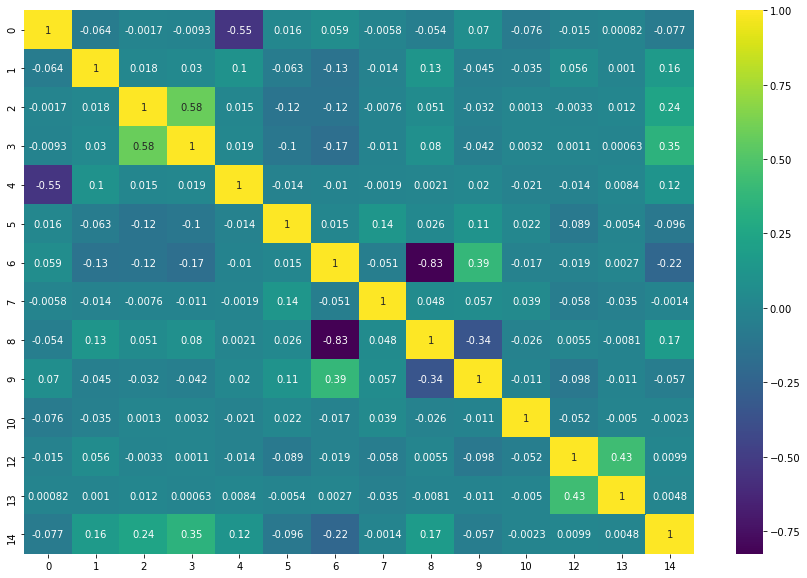

In [11]:
import seaborn as sns
new_df = new_df.drop([new_df.columns[11]], axis = 1)
plt.figure(figsize = (15, 10))
corr = new_df.corr()
#print(corr)
sns.heatmap(corr, cmap = 'viridis', annot = True)
plt.show()

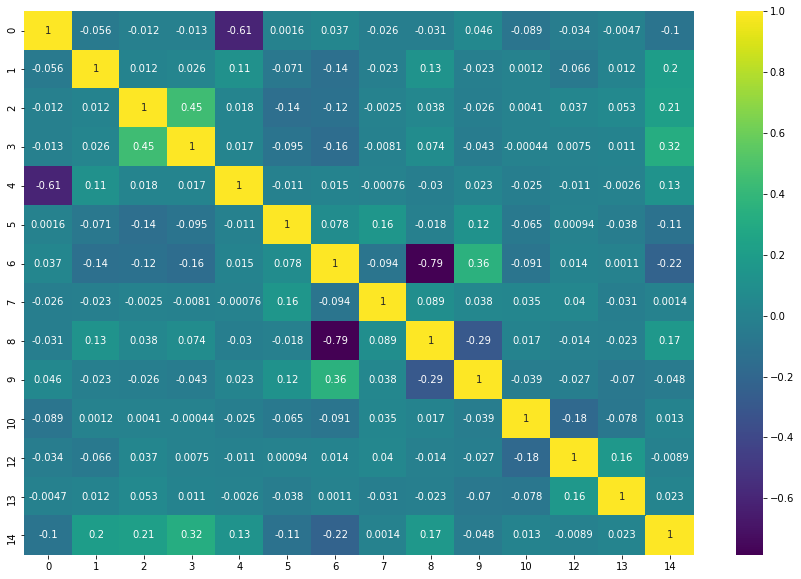

In [12]:
import seaborn as sns
test_df = test_df.drop([test_df.columns[11]], axis = 1)
plt.figure(figsize = (15, 10))
corr = test_df.corr()
#print(corr)
sns.heatmap(corr, cmap = 'viridis', annot = True)
plt.show()

In [13]:
new_df = new_df.to_numpy() 

In [14]:
test_df = test_df.to_numpy()

In [15]:
# new
new_inp_num = 13
x_new = new_df[:, 0:new_inp_num]
y_new = new_df[:, new_inp_num]
X_train_new, X_val_new, Y_train_new, Y_val_new = train_test_split(x_new, y_new, test_size=0.2, stratify=y_new, random_state=seed)

In [16]:
new_inp_num = 13
x_test = test_df[:, 0:new_inp_num]
y_test = test_df[:, new_inp_num]

In [17]:
# DT - depth 5

start = time.time() 

dt_depth5 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=seed)
dt_depth5.fit(x_new, y_new)

print("훈련 세트 정확도: {:.3f}".format(dt_depth5.score(x_new, y_new)))
pred_dt = dt_depth5.predict(x_test)
accuracy_dt = []

accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[0])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth5.feature_importances_))

훈련 세트 정확도: 0.886
Accuracy: 0.8709
time : 21.5738742351532

feature importance: 
[0.00000000e+00 1.15032399e-01 1.30067093e-02 6.40733439e-01
 5.30212278e-02 2.00049457e-03 1.63751386e-01 0.00000000e+00
 1.19722895e-02 0.00000000e+00 4.82054398e-04 0.00000000e+00
 0.00000000e+00]


In [18]:
dot_data = export_graphviz(dt_depth5, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Original_New_dt_depth5.png')

True

In [18]:
# DT - depth 6

start = time.time() 

dt_depth6 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=seed)
dt_depth6.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth6.score(x_new, y_new)))

pred_dt = dt_depth6.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[1])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth6.feature_importances_))

훈련 세트 정확도: 0.887
Accuracy: 0.8717
time : 25.659796953201294

feature importance: 
[1.30965576e-03 1.18080048e-01 1.26486729e-02 6.22790904e-01
 5.25959205e-02 1.79991165e-02 1.59165836e-01 0.00000000e+00
 1.19723895e-02 5.92905079e-04 2.68473713e-03 1.59814577e-04
 0.00000000e+00]


In [20]:
dot_data = export_graphviz(dt_depth6, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Original_New_dt_depth6.png')

True

In [19]:
# DT - depth 7

start = time.time() 

dt_depth7 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=seed)
dt_depth7.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth7.score(x_new, y_new)))

pred_dt = dt_depth7.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[2])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth7.feature_importances_))

훈련 세트 정확도: 0.887
Accuracy: 0.8713
time : 27.719262838363647

feature importance: 
[1.75922700e-03 1.17130883e-01 1.68083606e-02 6.11935285e-01
 5.42515923e-02 2.14784993e-02 1.56391481e-01 0.00000000e+00
 1.20124734e-02 3.25729207e-03 3.81554944e-03 1.10354709e-03
 5.58101722e-05]


In [22]:
dot_data = export_graphviz(dt_depth7, out_file=None, filled=True, rounded=True, special_characters=True, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Original_New_dt_depth7.png')

True

In [26]:
#Test Accuracy 22개 영상
i=1
for data, smp_ratio in  zip(test_H_file_list, test_sampling_ratio_H):
    each_test_df = pd.DataFrame()
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    each_test_df = pd.concat([each_test_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(each_test_df), '\n')
    each_test_df = each_test_df.drop([each_test_df.columns[11]], axis = 1)
    each_test_df = each_test_df.to_numpy()
    new_inp_num = 13
    each_x_test = each_test_df[:, 0:new_inp_num]
    each_y_test = each_test_df[:, new_inp_num]
    each_pred_dt = dt_depth7.predict(each_x_test)
    evaluation_accuracy = accuracy_score(each_y_test, each_pred_dt) 
    print(str(i)+". "+'Accuracy: %.4f\n' % evaluation_accuracy)
    i=i+1
    del each_pred_dt

0:  90587
1:  18978
concat:  109565 

1. Accuracy: 0.8355

0:  2386
1:  773
concat:  3159 

2. Accuracy: 0.7762

0:  9575
1:  2242
concat:  11817 

3. Accuracy: 0.8248

0:  7800
1:  1889
concat:  9689 

4. Accuracy: 0.8164

0:  28906
1:  1500
concat:  30406 

5. Accuracy: 0.9519

0:  2263
1:  559
concat:  2822 

6. Accuracy: 0.8221

0:  2553
1:  842
concat:  3395 

7. Accuracy: 0.7750

0:  41462
1:  7328
concat:  48790 

8. Accuracy: 0.8578

0:  132454
1:  14323
concat:  146777 

9. Accuracy: 0.9056

0:  10117
1:  3354
concat:  13471 

10. Accuracy: 0.7671

0:  8861
1:  2871
concat:  11732 

11. Accuracy: 0.7768

0:  1903
1:  623
concat:  2526 

12. Accuracy: 0.7720

0:  38617
1:  8421
concat:  47038 

13. Accuracy: 0.8298

0:  91384
1:  16263
concat:  107647 

14. Accuracy: 0.8555

0:  121756
1:  16476
concat:  138232 

15. Accuracy: 0.8843

0:  35040
1:  1169
concat:  36209 

16. Accuracy: 0.9663

0:  14798
1:  4136
concat:  18934 

17. Accuracy: 0.7963

0:  10196
1:  2617
concat:  1

In [24]:
# DT - depth 8

start = time.time() 

dt_depth8 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=seed)
dt_depth8.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth8.score(x_new, y_new)))

pred_dt = dt_depth8.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[3])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth8.feature_importances_))

훈련 세트 정확도: 0.887
Accuracy: 0.8722
time : 34.184662103652954

feature importance: 
[2.26016546e-03 1.16154982e-01 1.81343475e-02 6.05674192e-01
 5.41739309e-02 2.41550081e-02 1.55108645e-01 0.00000000e+00
 1.23194609e-02 4.29618538e-03 6.09489864e-03 1.42916322e-03
 1.99020121e-04]


In [36]:
#Test Accuracy 22개 영상
i=1
for data, smp_ratio in  zip(test_H_file_list, test_sampling_ratio_H):
    each_test_df = pd.DataFrame()
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    each_test_df = pd.concat([each_test_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(each_test_df), '\n')
    each_test_df = each_test_df.drop([each_test_df.columns[11]], axis = 1)
    each_test_df = each_test_df.to_numpy()
    new_inp_num = 13
    each_x_test = each_test_df[:, 0:new_inp_num]
    each_y_test = each_test_df[:, new_inp_num]
    each_pred_dt = dt_depth8.predict(each_x_test)
    evaluation_accuracy = accuracy_score(each_y_test, each_pred_dt) 
    print(str(i)+". "+'Accuracy: %.4f\n' % evaluation_accuracy)
    i=i+1
    del each_pred_dt

0:  90587
1:  18978
concat:  109565 

1. Accuracy: 0.8368

0:  2386
1:  773
concat:  3159 

2. Accuracy: 0.7759

0:  9575
1:  2242
concat:  11817 

3. Accuracy: 0.8288

0:  7800
1:  1889
concat:  9689 

4. Accuracy: 0.8147

0:  28906
1:  1500
concat:  30406 

5. Accuracy: 0.9516

0:  2263
1:  559
concat:  2822 

6. Accuracy: 0.8249

0:  2553
1:  842
concat:  3395 

7. Accuracy: 0.7803

0:  41462
1:  7328
concat:  48790 

8. Accuracy: 0.8592

0:  132454
1:  14323
concat:  146777 

9. Accuracy: 0.9057

0:  10117
1:  3354
concat:  13471 

10. Accuracy: 0.7729

0:  8861
1:  2871
concat:  11732 

11. Accuracy: 0.7806

0:  1903
1:  623
concat:  2526 

12. Accuracy: 0.7720

0:  38617
1:  8421
concat:  47038 

13. Accuracy: 0.8319

0:  91384
1:  16263
concat:  107647 

14. Accuracy: 0.8558

0:  121756
1:  16476
concat:  138232 

15. Accuracy: 0.8850

0:  35040
1:  1169
concat:  36209 

16. Accuracy: 0.9667

0:  14798
1:  4136
concat:  18934 

17. Accuracy: 0.8000

0:  10196
1:  2617
concat:  1

In [25]:
# DT - depth 9

start = time.time() 

dt_depth9 = DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, random_state=seed)
dt_depth9.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth9.score(x_new, y_new)))

pred_dt = dt_depth9.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[4])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth9.feature_importances_))

훈련 세트 정확도: 0.887
Accuracy: 0.8715
time : 37.538413763046265

feature importance: 
[2.68981923e-03 1.15384483e-01 1.86575555e-02 6.00952310e-01
 5.37486034e-02 2.66896701e-02 1.53906356e-01 4.42741640e-06
 1.22250507e-02 5.11247329e-03 7.12937327e-03 2.62143101e-03
 8.78447652e-04]


In [26]:
# DT - depth 10

start = time.time() 

dt_depth10 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=seed)
dt_depth10.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth10.score(x_new, y_new)))

pred_dt = dt_depth10.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[5])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth10.feature_importances_))

훈련 세트 정확도: 0.887
Accuracy: 0.8705
time : 39.05475378036499

feature importance: 
[3.23808622e-03 1.14435039e-01 1.88270242e-02 5.95884715e-01
 5.33110278e-02 2.91017134e-02 1.52662487e-01 2.46302688e-05
 1.22171491e-02 5.86410782e-03 7.63776960e-03 4.83287070e-03
 1.96337963e-03]


In [38]:
#Test Accuracy 22개 영상
i=1
for data, smp_ratio in  zip(test_H_file_list, test_sampling_ratio_H):
    each_test_df = pd.DataFrame()
    df_class0 = data[data[new_input_num]==0]
    print("0: ", len(df_class0))
    df_class1 = data[data[new_input_num]==1]
    print("1: ", len(df_class1))
    each_test_df = pd.concat([each_test_df, df_class0, df_class1], ignore_index = True)
    print("concat: ", len(each_test_df), '\n')
    each_test_df = each_test_df.drop([each_test_df.columns[11]], axis = 1)
    each_test_df = each_test_df.to_numpy()
    new_inp_num = 13
    each_x_test = each_test_df[:, 0:new_inp_num]
    each_y_test = each_test_df[:, new_inp_num]
    each_pred_dt = dt_depth10.predict(each_x_test)
    evaluation_accuracy = accuracy_score(each_y_test, each_pred_dt) 
    print(str(i)+". "+'Accuracy: %.4f\n' % evaluation_accuracy)
    i=i+1
    del each_pred_dt

0:  90587
1:  18978
concat:  109565 

1. Accuracy: 0.8325

0:  2386
1:  773
concat:  3159 

2. Accuracy: 0.7803

0:  9575
1:  2242
concat:  11817 

3. Accuracy: 0.8218

0:  7800
1:  1889
concat:  9689 

4. Accuracy: 0.8162

0:  28906
1:  1500
concat:  30406 

5. Accuracy: 0.9504

0:  2263
1:  559
concat:  2822 

6. Accuracy: 0.8239

0:  2553
1:  842
concat:  3395 

7. Accuracy: 0.7676

0:  41462
1:  7328
concat:  48790 

8. Accuracy: 0.8585

0:  132454
1:  14323
concat:  146777 

9. Accuracy: 0.9051

0:  10117
1:  3354
concat:  13471 

10. Accuracy: 0.7786

0:  8861
1:  2871
concat:  11732 

11. Accuracy: 0.7814

0:  1903
1:  623
concat:  2526 

12. Accuracy: 0.7736

0:  38617
1:  8421
concat:  47038 

13. Accuracy: 0.8272

0:  91384
1:  16263
concat:  107647 

14. Accuracy: 0.8549

0:  121756
1:  16476
concat:  138232 

15. Accuracy: 0.8818

0:  35040
1:  1169
concat:  36209 

16. Accuracy: 0.9668

0:  14798
1:  4136
concat:  18934 

17. Accuracy: 0.7988

0:  10196
1:  2617
concat:  1

In [27]:
# DT - depth 11

start = time.time() 

dt_depth11 = DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, random_state=seed)
dt_depth11.fit(x_new, y_new)
print("훈련 세트 정확도: {:.3f}".format(dt_depth11.score(x_new, y_new)))

pred_dt = dt_depth11.predict(x_test)
accuracy_dt.append(accuracy_score(y_test, pred_dt))

print('Accuracy: %.4f' % accuracy_dt[6])
print("time :", time.time() - start)

print("\nfeature importance: \n{}".format(dt_depth11.feature_importances_))

훈련 세트 정확도: 0.888
Accuracy: 0.8696
time : 41.496809244155884

feature importance: 
[3.27293418e-03 1.13396217e-01 1.87417368e-02 5.90219836e-01
 5.29806492e-02 3.05881539e-02 1.51295333e-01 1.54705261e-04
 1.21309646e-02 6.90118241e-03 8.95152861e-03 8.16364132e-03
 3.20311863e-03]


In [22]:
# SVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import PolynomialFeatures

# rf
from sklearn.ensemble import RandomForestClassifier

In [29]:
# SVM - C=1

start = time.time()  # 시작 시간 저장

svm_clf = Pipeline([
                    ("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))
                  ])
svm_clf.fit(x_new, y_new)

pred_svm = svm_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_svm))

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

del svm_clf, pred_svm

Accuracy: 0.8653
time : 262.81024837493896


In [23]:
# rf - 5
start = time.time() 
rf_clf = RandomForestClassifier(n_estimators=5, random_state=42)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8537
time : 57.950093269348145


In [24]:
# rf - 6
start = time.time() 
rf_clf = RandomForestClassifier(n_estimators=6, random_state=42)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8579
time : 68.33543968200684


In [25]:
# rf - 7
start = time.time()  # 시작 시간 저장
rf_clf = RandomForestClassifier(n_estimators=7, random_state=42)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8561
time : 80.54419946670532


In [46]:
# rf - 8
start = time.time()  # 시작 시간 저장
rf_clf = RandomForestClassifier(n_estimators=8, random_state=42)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8588
time : 92.40862703323364


In [47]:
# rf - 9
start = time.time()  # 시작 시간 저장
rf_clf = RandomForestClassifier(n_estimators=9, random_state=42)
rf_clf.fit(x_new, y_new)

pred_rf = rf_clf.predict(x_test)
print('Accuracy: %.4f'  % accuracy_score(y_test, pred_rf))
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
del rf_clf, pred_rf

Accuracy: 0.8582
time : 102.50624179840088
